In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt

In [24]:
with open("E:/CDEX/ovbb/WaveSimulation/SAGE_PSS-master/SAGE_PSS-master/InputFile/PPCGe_Position.csv",'w',newline='') as PPCGe_Position:
    writer=csv.writer(PPCGe_Position)
    zp=np.linspace(1,29,28,endpoint=False)
    rp=np.linspace(0,44,44,endpoint=False)
    index=1
    amp=500
    for z in zp:
        for r in rp:
            writer.writerow([index,amp,r,0,z,''])
            index+=1

In [15]:
wavefile=r'E:\CDEX\ovbb\WaveSimulation\SAGE_PSS-master\SAGE_PSS-master\build\OutputFile\Waveform.csv'
trackfile=r'E:\CDEX\ovbb\WaveSimulation\SAGE_PSS-master\SAGE_PSS-master\build\OutputFile\Track.csv'
wave_count = len(open(wavefile,'r').readlines())
wave=np.zeros((wave_count,300))
with open(wavefile,'r',) as wavef:
    reader=wavef.readlines()
    count=0
    for line in reader:
        Line=line.split(",")
        for i in range(300):
            wave[count,i]=float(Line[i+3])
        count+=1


##############read track
class eventpath():
    def __init__(self,e_num,h_num):
        self.er=np.zeros((e_num,))
        self.ez=np.zeros((e_num,))
        self.hr=np.zeros((h_num,))
        self.hz=np.zeros((h_num,))

track=[]
track_count = len(open(trackfile,'r').readlines())

with open(trackfile,'r') as trackf:
    reader=trackf.readlines()
    count=0
    while(count<track_count):
        Line=reader[count].split(",")
        count+=1
        
        e_num=int(Line[0])
        h_num=int(Line[1])
        path=eventpath(e_num,h_num)
        
        for i in range(max(e_num,h_num)):
            
            Line=reader[count].split(",")
            count+=1
            
            if(i<e_num):
                path.er[i]=float(Line[1])
                path.ez[i]=float(Line[3])
            if(i<h_num):
                path.hr[i]=float(Line[6])
                path.hz[i]=float(Line[8])
        track.append(path)  

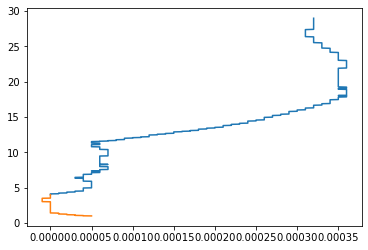

In [65]:
i=44
plt.plot(track[i].er,track[i].ez)
plt.plot(track[i].hr,track[i].hz)

In [2]:
plib=np.load("E:\CDEX\ovbb\WaveSimulation\SimulatedEvents\PPC_signal.npy")

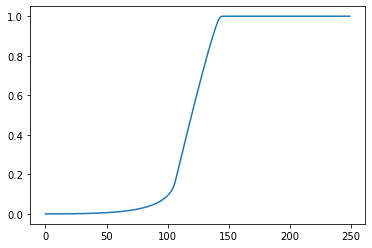

In [4]:
plt.plot(plib[0:250,50,28])

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars


528337247.27712613


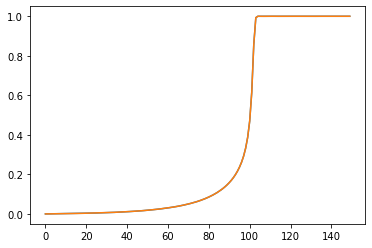

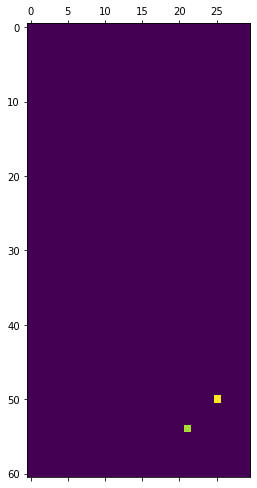

In [135]:
R=25
Z=50
NoiseAmp=0.0001
wave_length=150



target_wave=plib[0:wave_length,Z,R].copy()
plt.plot(target_wave)
Noise=NoiseAmp*np.random.randn(wave_length)

chi=np.zeros((61,30),dtype=float)

target_wave+=Noise
plt.plot(target_wave)

for r in range(0,30):
    for z in range(0,61):
        chi[z,r]+=sum((target_wave-plib[0:wave_length,z,r])**2)/sum(plib[:,z,r])

print(chi[Z,R]**-1)
plt.matshow(chi**-1)
plt.show()
        


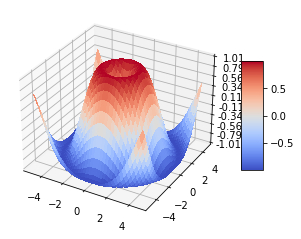

In [75]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()